In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import timeit
import corner

In [2]:
target_dict={90:'SNIa',67:'SNIa-91bg',
             52:'SNIax',42:'SNII',
             62:'SNIbc',95:'SLSN-I',
             15:'TDE',64:'KN',
             88:'AGN',92:'RRL',
             65:'M-dwarf',16:'EB',
             53:'Mira',6:'Lens-Single',
             994:'PISN', 999:'UNKNOWN', 1:'NON PISN'}
passband_list = {0:'u',1:'g',2:'r',3:'i',4:'z',5:'y'}

## Polynomial model

In [57]:
cols = ['A','B','C','err','points','max_flux']
nb_extra = 0   #Number of extra parameter that you dont want to plot
nb_band = 4

sample = 'Silver'
curve = 'Complete/'
PISN_split = '-1_' 
model = 'poly'
purpose = 'train'

In [58]:
path="../../plasticc/param_table/"+sample+"/"+curve+purpose+PISN_split+model+".pkl"
data=pd.read_pickle(path)
nb_param = len(cols)
data

,object_id,target,0,1,2,3,4,5,6,7,...,14,15,16,17,18,19,20,21,22,23
0,713,88,-8.091144e-07,-0.000860,0.501113,1.683054,56.0,10.529041,-1.352675e-06,-0.000403,...,0.575635,3.405014,56.0,9.827934,-5.629864e-07,-0.000467,0.225012,3.876559,56.0,14.770886
1,730,42,7.966541e-07,-0.000238,0.004927,1.240684,52.0,20.994711,3.594613e-07,0.000072,...,0.011278,1.305648,51.0,41.159981,9.047060e-07,-0.000433,0.037748,1.610196,51.0,47.310059
2,745,90,-9.798144e-07,0.000830,-0.037826,0.463179,56.0,220.795212,-1.546852e-06,0.001319,...,-0.063672,0.583286,56.0,183.633118,-1.702440e-06,0.001463,-0.074844,0.575853,55.0,141.513290
3,1124,90,4.360581e-07,-0.000047,-0.005754,0.791369,58.0,106.671692,2.813419e-07,0.000026,...,-0.024952,0.814050,58.0,143.600189,1.892200e-07,0.000051,-0.012496,0.943270,57.0,109.157585
4,1598,90,6.155099e-07,-0.000396,0.028149,0.697264,58.0,1289.851440,6.379362e-07,-0.000409,...,0.030395,0.770834,58.0,737.409363,6.499661e-07,-0.000420,0.030524,0.738354,57.0,653.044312
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1577,341607,994,2.652263e-06,-0.003331,0.947515,0.072384,58.0,938.352173,2.826472e-06,-0.003616,...,1.115966,0.056364,58.0,1363.286133,2.916212e-06,-0.003803,1.151502,0.080312,57.0,1433.637329
1578,341653,42,7.477905e-07,-0.001133,0.410804,1.402888,58.0,106.049667,7.982197e-07,-0.001300,...,0.516480,2.347044,58.0,107.772675,1.035542e-06,-0.001538,0.567512,1.873313,57.0,109.004547
1579,342288,52,1.179835e-06,-0.001494,0.397884,0.736567,52.0,8.509514,3.062963e-06,-0.003418,...,0.464312,1.008370,51.0,13.337147,1.244707e-06,-0.001433,0.334324,4.120420,51.0,15.942284
1580,342659,90,1.288735e-06,-0.001499,0.378988,1.051563,56.0,134.420349,1.593808e-06,-0.001903,...,0.512053,0.984244,56.0,117.679771,1.579106e-06,-0.001931,0.514623,0.996521,56.0,102.602386


In [59]:
data.loc[data['target']!=994,'target']=1#BINARY

param_table_other = pd.DataFrame()
param_table_PISN = pd.DataFrame()

for k in range(len(cols)) :
    
    table_single = pd.DataFrame(data={cols[k] : []})
    
    for i in range(nb_band):

        pos = i*(nb_param+nb_extra)+k
        table = data[data['target']!=994].loc[:,[pos]].rename(columns={pos: cols[k]})
        table_single = table_single.append(table,ignore_index=True)

    param_table_other = pd.concat([param_table_other,table_single],axis=1)
    
    
    
for k in range(len(cols)) :
    
    table_single = pd.DataFrame(data={cols[k] : []})
    
    for i in range(nb_band):

        pos = i*(nb_param+nb_extra)+k
        table = data[data['target']==994].loc[:,[pos]].rename(columns={pos: cols[k]})
        table_single = table_single.append(table,ignore_index=True)

    param_table_PISN = pd.concat([param_table_PISN,table_single],axis=1)

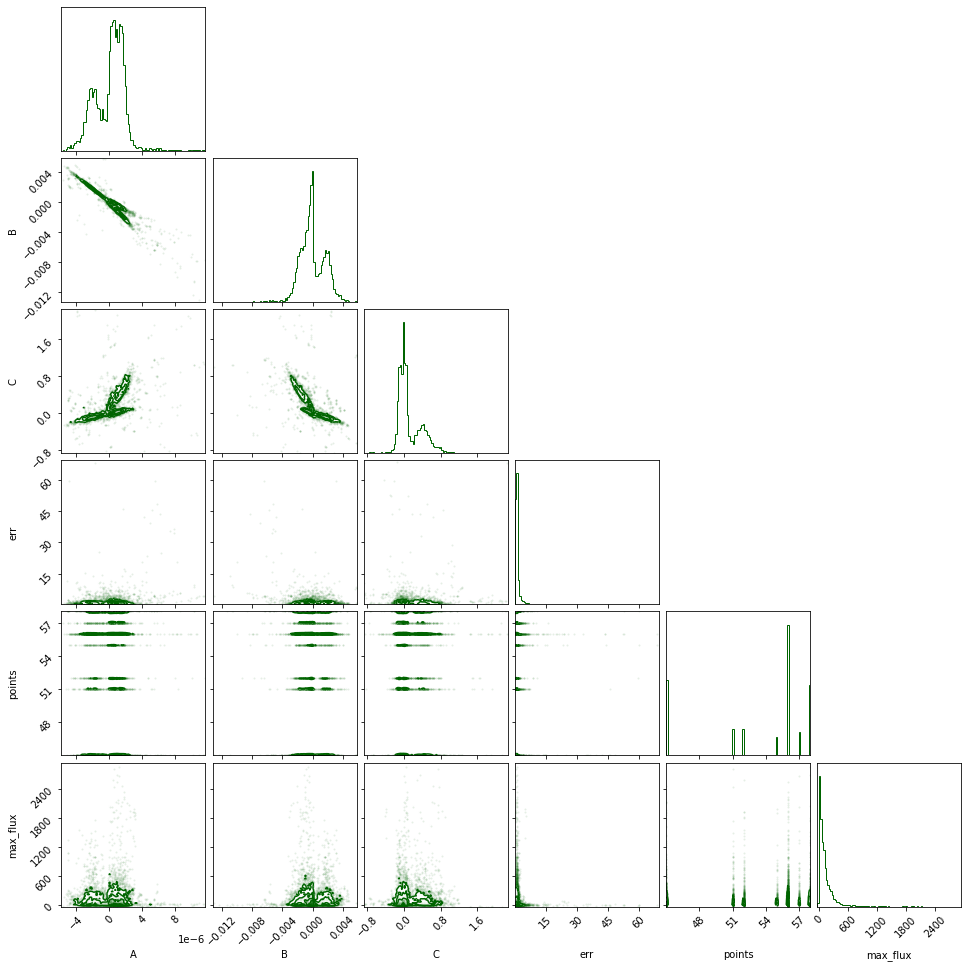

In [60]:
zoom = [0.99,0.99,0.99,0.99,0.99,0.99]

PISN = param_table_PISN
other = param_table_other

figure = corner.corner(other, bins=100,range=zoom,color='darkgreen',labels=cols) 
#corner.corner(PISN,fig=figure,color='red')

plt.savefig("corner_6p.png")